<a href="https://colab.research.google.com/github/kdtrinh/probabilitytheoryandpython/blob/main/DysonsBrownianMotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dyson's Brownian Motions

Objective: to simulate a path of Dyson's Brownian motion.


## Brownian motions

A standard Brownian motion is a continuous stochastic process $(b(t): t \ge 0)$ with the following properties:
- $b(0) = 0$, 
- for any $0 \le t_0 < t_1 < \cdots < t_n$, the random variables $\{b(t_i) - b(t_{i-1})\}_{i=1}^{n}$ are independent, 
- for any $0 \le s < t$, the difference $b(t) - b(s)$ has the Gaussian distribution with mean zero and variance $t - s$.

We use the following to simulate a path of a standard Brownian motion in the time interval $t \in [0, 1]$.
- Let $N$ be a large interger number. Then simulate a random sequence $gauss=(gauss[1], gauss[2], \dots, gauss[N])$ of length $N$ from the standard Gaussian distribution.

- Since $\{b(\frac iN) - b(\frac{i-1}N)\}_{i=1}^N$ are $N$ i.i.d. (independent identically distributed) random variables of Gaussian distribution with mean zero and variance $\frac 1N$, we use $\frac1{\sqrt N}gauss[i]$ for $b(\frac iN) - b(\frac{i-1}N), i =1, \dots, N$. Then 
$$
  b(\tfrac iN) = \frac1{\sqrt N}(gauss[1] + gauss[2] + \cdots + gauss[i]), \quad b(0) = 0.
$$  
The sequence $b(\frac iN)$ can be calculated from the sequence $gauss:=(0., gauss[1], gauss[2], \dots, gauss[N])$ by using `numpy.cumsum(gauss)`.
- For $t \in (\frac {i-1}N, \frac iN)$, $b(t)$ is defined to be the linear interpolation of $b(\frac{i-1}N)$ and $b(\frac iN)$.



<function matplotlib.pyplot.show>

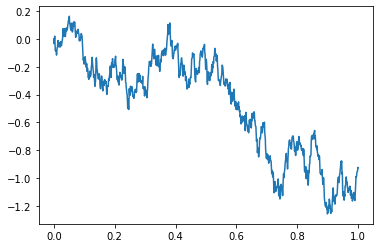

In [2]:
# Simulate a path of a standard Brownian motion in [0, 1]
import numpy as np 
from numpy import random, linspace
import matplotlib.pyplot as plt

stepNumbers = 1000

gauss = random.default_rng(seed=42).normal(size=stepNumbers+1) / np.sqrt(stepNumbers)
#by specifying the seed, everytime we get exactly the same path
#gauss = random.default_rng().normal(size=stepNumbers+1) / np.sqrt(stepNumbers)
gauss[0] = 0
#gauss = random.default_rng().normal(size=stepNumbers+1)
#gauss = np.insert(gauss, 0, 0.)

BM = np.cumsum(gauss)


plt.figure()
xScale = linspace(0,1,stepNumbers + 1)
plt.plot(xScale, BM)
plt.show

# Independent standard Brownian motions



<function matplotlib.pyplot.show>

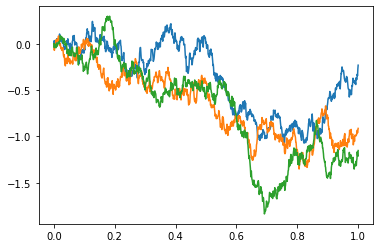

In [3]:
dim = 3
stepNumbers = 1000

gaussd = random.default_rng(seed=42).normal(size=(stepNumbers+1, dim)) / np.sqrt(stepNumbers)
#gaussd = random.default_rng().normal(size=(stepNumbers+1, dim)) / np.sqrt(stepNumbers)
gaussd[0, :] = 0.


BMs = np.cumsum(gaussd, axis=0)


plt.figure()
xScale = linspace(0,1,stepNumbers + 1)
for i in range(dim):
  plt.plot(xScale, BMs[:, i])
plt.show

## Dyson's Brownian motions

For $N \in \mathbb N$, let $\{B_{ij}(t)\}_{1 \le i \le j \le N}$ be independent standard Brownian motions. Define a symmetric matrix of Brownian motions as 
$$
  H^{(N)}_{ji}(t) = H^{(N)}_{ij}(t) 
  =\begin{cases}
    \frac{\sqrt 2}{\sqrt N} B_{ii}, & i=j,\\
    \frac{1}{\sqrt N} B_{ij}, & i < j.
  \end{cases}
$$
Let $\lambda(t) = \{\lambda_1(t) \le \lambda_2(t) \le \cdots \le \lambda_N(t)\}$ be the eigenvalues of $H^{(N)}(t)$. The process $\lambda(t)$ is called Dyson's Brownian motion. 

**Theorem (Dyson).**
The process $(\lambda(t))_{t \ge 0}$ is a semi-martingale. Its joint law is the unique distribution on the space of continuous $\mathbb R^N$-valued functions on $[0, \infty)$ so that 
$$
	\mathbb P \Big(\forall t > 0, \lambda_1(t) < \lambda_2(t) < \cdots < \lambda_N(t)\Big) = 1,
$$
which is a weak solution to the system of stochastic differential equations
$$
  d\lambda_i(t) = \frac{\sqrt 2}{\sqrt N} dW_i(t) + \frac 1N \sum_{j : j \neq i} \frac{1}{\lambda_i(t) - \lambda_j(t)} dt,\quad i = 1, 2, \dots, N,
$$
where $\{W_i(t)\}_{1 \le i \le N}$ are independent standard Brownian motions. See Secion 4.3 in [1] for more details. 


__References__

>[1] G.W. Anderson, A. Guionnet and O. Zeitouni: An Introduction to Random Matrices, Cambridge Studies in Advanced Mathematics, vol. 118, Cambridge University Press, Cambridge, 2010.


## Simulation of a path of Dyson's Brownian motions

We simulate a path of Dyson's Brownian motion by simulating a Brownian motion matrix $H^{(N)}(t)$, and then calculate its ordered eigenvalues.

<function matplotlib.pyplot.show>

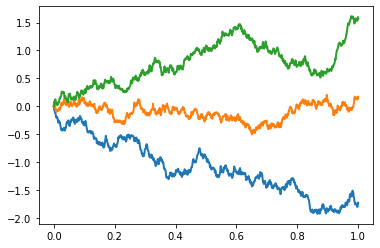

In [4]:
import numpy as np 
from numpy import random, linspace
import matplotlib.pyplot as plt

n = 3 # size of the matrix
stepNumbers = 1000

matrixGauss = random.default_rng().normal(size=(stepNumbers + 1, n, n)) / np.sqrt(stepNumbers)
matrixGauss[0, :, :] = 0 # Set initial values
matrixGauss = (matrixGauss + np.transpose(matrixGauss, axes=(0, 2, 1)))/np.sqrt(2 * n)

matrixBMs = np.cumsum(matrixGauss, axis=0)
#matrixBMs = (matrixBMs + np.transpose(matrixBMs))/np.sqrt(2)


lam = np.zeros((1, n))
for i in range(1, stepNumbers + 1):
  eValues, eVectors = np.linalg.eig(matrixBMs[i, :, :])
  eValues.sort()
  #print(eValues)
  lam = np.append(lam, eValues.reshape((1, n)), axis=0)

#print(lam )


xScale = linspace(0,1,stepNumbers + 1)
plt.figure() # To start a new figure
for i in range(n):
  plt.plot(xScale, lam[:, i], linewidth=2)
plt.show

## Author

<a href="https://sites.google.com/site/kdtrinhprob/Home" target="_blank">Khanh Duy Trinh</a>

> 2021-08-28: Created